<a href="https://colab.research.google.com/github/Satvika1825/pothole-detection/blob/main/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!unzip /content/drive/MyDrive/Pathhole_detection.v6i.yolov8.zip -d /content/dataset

Archive:  /content/drive/MyDrive/Pathhole_detection.v6i.yolov8.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/106_jpg.rf.56bae6c6a0e25c387ffe77ec789a5a10.jpg  
 extracting: /content/dataset/test/images/118_jpg.rf.b5745bd72776fd7fea8479a531f5a95a.jpg  
 extracting: /content/dataset/test/images/129_jpg.rf.3b8faad5fc638518c5798255ab8620bf.jpg  
 extracting: /content/dataset/test/images/17_jpg.rf.360aa6b1287cd971809537b108061475.jpg  
 extracting: /content/dataset/test/images/232_jpg.rf.13afb4e95775f8b75c5e5b9d89fe7d81.jpg  
 extracting: /content/dataset/test/images/288_jpg.rf.f67adf374f71f51026eff3d394d4091a.jpg  
 extracting: /content/dataset/test/images/320_jpg.rf.7ea64f661ba694551be2fbde7751dfab.jpg  
 extracting: /content/dataset/test/images/326_jpg.rf.a000c1a641851

In [4]:
!ls -la /content/dataset

total 32
drwxr-xr-x 5 root root 4096 Oct 11 16:02 .
drwxr-xr-x 1 root root 4096 Oct 11 16:02 ..
-rw-r--r-- 1 root root  305 Oct 10 15:12 data.yaml
-rw-r--r-- 1 root root  159 Oct 10 15:12 README.dataset.txt
-rw-r--r-- 1 root root 1693 Oct 10 15:12 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Oct 10 15:12 test
drwxr-xr-x 4 root root 4096 Oct 10 15:12 train
drwxr-xr-x 4 root root 4096 Oct 10 15:12 valid


In [5]:
!cat /content/dataset/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['normal', 'objects', 'pothole']

roboflow:
  workspace: satvika-a66oq
  project: pathhole-detection-c15mn
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/satvika-a66oq/pathhole-detection-c15mn/dataset/6

In [6]:
yaml_path = "/content/dataset/data.yaml"


In [7]:
import yaml

with open(yaml_path) as f:
    data = yaml.safe_load(f)

data['path'] = '/content/dataset'
data['train'] = '/content/dataset/train/images'
data['val'] = '/content/dataset/valid/images'
data['test'] = '/content/dataset/test/images'

with open(yaml_path, 'w') as f:
    yaml.safe_dump(data, f)

print("✅ data.yaml updated successfully!")
!cat /content/dataset/data.yaml


✅ data.yaml updated successfully!
names:
- normal
- objects
- pothole
nc: 3
path: /content/dataset
roboflow:
  license: CC BY 4.0
  project: pathhole-detection-c15mn
  url: https://universe.roboflow.com/satvika-a66oq/pathhole-detection-c15mn/dataset/6
  version: 6
  workspace: satvika-a66oq
test: /content/dataset/test/images
train: /content/dataset/train/images
val: /content/dataset/valid/images


In [8]:
from ultralytics import YOLO

# Load a small YOLOv8 model (nano) for quick testing
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='/content/dataset/data.yaml',  # your updated YAML
    epochs=100,                          # number of training epochs
    imgsz=640,                          # image size
    batch=8,                            # adjust if GPU memory is low
    name='pothole_yolo_run'             # folder name for training results
)


Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolo_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c64a3da180>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
!ls /content/runs/detect/pothole_yolo_run


args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch12240.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch12241.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch12242.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


In [10]:
model.val()


Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1815.5±1048.6 MB/s, size: 83.0 KB)
val: Scanning /content/dataset/valid/labels.cache... 40 images, 106 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 146/146 311.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.5it/s 2.9s
                   all        146        127      0.371      0.384      0.327      0.134
               objects          3          3      0.435      0.333       0.35      0.174
               pothole         37        124      0.306      0.435      0.305     0.0939
Speed: 3.3ms preprocess, 6.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c69110bef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

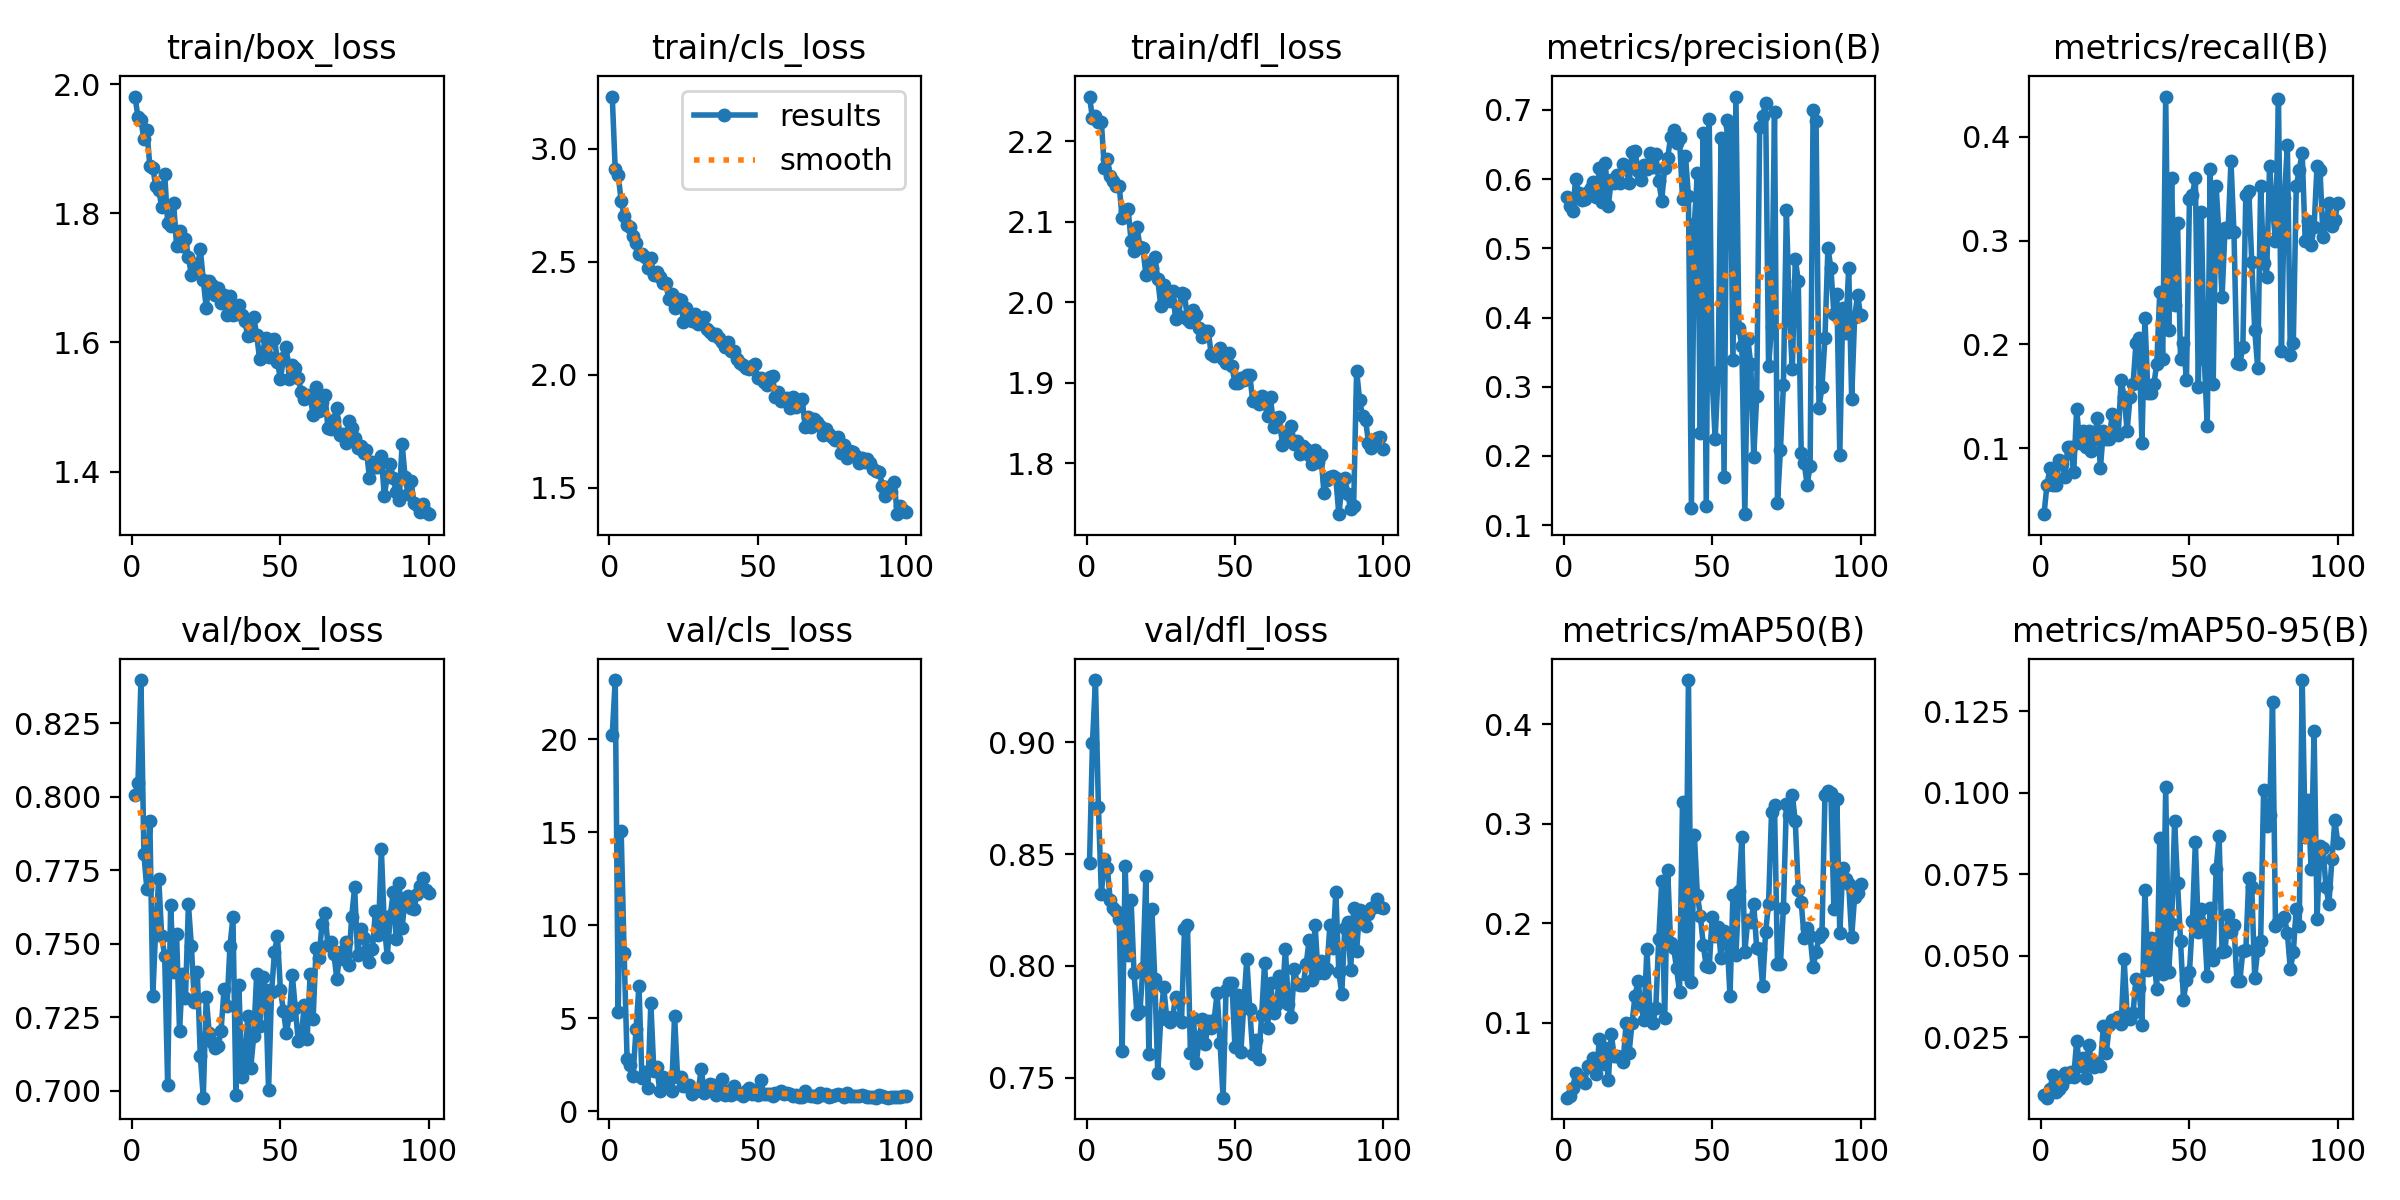

In [11]:
from IPython.display import Image

Image('/content/runs/detect/pothole_yolo_run/results.png')


In [12]:
model.val()


Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1217.6±613.8 MB/s, size: 95.6 KB)
val: Scanning /content/dataset/valid/labels.cache... 40 images, 106 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 146/146 321.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.6it/s 2.8s
                   all        146        127      0.371      0.384      0.327      0.134
               objects          3          3      0.435      0.333       0.35      0.174
               pothole         37        124      0.306      0.435      0.305     0.0939
Speed: 3.1ms preprocess, 4.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c691214fe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [13]:
from ultralytics import YOLO

# Load the trained model weights
model = YOLO('/content/runs/detect/pothole_yolo_run/weights/best.pt')

model.predict(
    source='/content/dataset/test/images',
    conf=0.25,
    save=True,
    show=True
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/66 /content/dataset/test/images/106_jpg.rf.56bae6c6a0e25c387ffe77ec789a5a10.jpg: 640x640 1 pothole, 7.3ms
image 2/66 /content/dataset/test/images/118_jpg.rf.b5745bd72776fd7fea8479a531f5a95a.jpg: 640x640 2 potholes, 7.3ms
image 3/66 /content/dataset/test/images/129_jpg.rf.3b8faad5fc638518c5798255ab8620bf.jpg: 640x640 1 pothole, 7.2ms
image 4/66 /content/dataset/test/images/17_jpg.rf.360aa6b1287cd971809537b108061475.jpg: 640x640 2 potholes, 7.2ms
image 5/66 /content/dataset/test/images/232_jpg.rf.13afb4e95775f8b75c5e5b9d89fe7d81.jpg: 640x640 9 potholes, 7.2ms
image 6/66 /content/dataset/test/images/288_jpg.rf.f67adf374f71f51026eff3d394d4091a.jpg: 640x640 1 pothole, 7.2ms
image 7/66 /content/dataset/test/images/320_jpg.rf.7ea64f661ba694551be2fbde7751dfab.jpg: 640x640 (no detections), 7.3ms
image 8/66 /content/dataset/test/images/326_jpg.rf.a000c1a641851706de30904e98308a8e.jpg: 640x640 2 potholes, 7.3ms
imag

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'normal', 1: 'objects', 2: 'pothole'}
 obb: None
 orig_img: array([[[ 10,  10,  10],
         [ 18,  18,  18],
         [ 26,  26,  26],
         ...,
         [217, 217, 217],
         [212, 212, 212],
         [208, 208, 208]],
 
        [[  8,   8,   8],
         [ 12,  12,  12],
         [ 23,  23,  23],
         ...,
         [217, 217, 217],
         [212, 212, 212],
         [209, 209, 209]],
 
        [[  7,   7,   7],
         [  7,   7,   7],
         [ 19,  19,  19],
         ...,
         [217, 217, 217],
         [212, 212, 212],
         [209, 209, 209]],
 
        ...,
 
        [[ 91,  91,  91],
         [ 86,  86,  86],
         [ 78,  78,  78],
         ...,
         [239, 239, 239],
         [243, 243, 243],
         [245, 245, 245]],
 
        [[ 95,  95,  95],
         [ 92,  92,  92],
         [ 82,  82,  82],
    

In [15]:
!ls /content/runs/detect/predict/

106_jpg.rf.56bae6c6a0e25c387ffe77ec789a5a10.jpg
118_jpg.rf.b5745bd72776fd7fea8479a531f5a95a.jpg
129_jpg.rf.3b8faad5fc638518c5798255ab8620bf.jpg
17_jpg.rf.360aa6b1287cd971809537b108061475.jpg
232_jpg.rf.13afb4e95775f8b75c5e5b9d89fe7d81.jpg
288_jpg.rf.f67adf374f71f51026eff3d394d4091a.jpg
320_jpg.rf.7ea64f661ba694551be2fbde7751dfab.jpg
326_jpg.rf.a000c1a641851706de30904e98308a8e.jpg
45_jpg.rf.7aff8c18757eb2342ecd3e7102d4c725.jpg
50_jpg.rf.a935ae825e86d51b65b61de44b1557c0.jpg
72_jpg.rf.aa8bdb22fcbc352d1b52ced288084f45.jpg
images175_jpg.rf.e90f8eb0bf58105d264e16d8ebd1fa81.jpg
images179_jpg.rf.bde08c1768e2bfec5f4a939264f55383.jpg
images180_jpg.rf.3881f4506c87023bae1763f25811af69.jpg
images180_jpg.rf.87679f1fa0f2974481c040d809f9c1e8.jpg
images199_jpg.rf.3fdd1833c2661ccd9677a5021eab9b5a.jpg
images199_jpg.rf.fa6ed68a71072ec6f68bd688904fdbf1.jpg
images208_jpg.rf.782231526808e30e3a3db3d8ed885d81.jpg
images212_jpg.rf.5821aec74b7c77ef4f98dc3501fd76d8.jpg
images212_jpg.rf.81c1a660cc9aef88500f50605c0


image 1/1 /content/dataset/test/images/72_jpg.rf.aa8bdb22fcbc352d1b52ced288084f45.jpg: 640x640 6 potholes, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict25
Predicted image saved to: /content/runs/detect/predict25/72_jpg.rf.aa8bdb22fcbc352d1b52ced288084f45.jpg


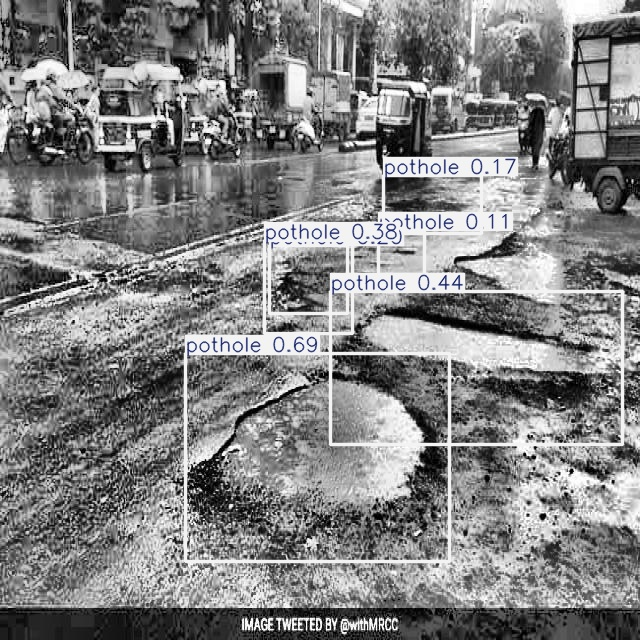

In [44]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Step 1: Load your trained YOLOv8 model
model = YOLO('/content/runs/detect/pothole_yolo_run/weights/best.pt')

# Step 2: Path to your test image
test_img = '/content/dataset/test/images/72_jpg.rf.aa8bdb22fcbc352d1b52ced288084f45.jpg'

# Step 3: Run prediction with a lower confidence threshold and save the result
results = model.predict(
    source=test_img,  # your test image
    conf=0.1,        # lower confidence
    save=True,        # save output image
    show=False         # don't display each step inline
)

# Step 4: Display the saved image
if results and hasattr(results[0], 'save_dir'):
    saved_results_dir = results[0].save_dir
    image_name = os.path.basename(test_img)
    predicted_image_path = os.path.join(saved_results_dir, image_name)

    print(f"Predicted image saved to: {predicted_image_path}")

    display(Image(predicted_image_path))
else:
    print("Prediction results or save directory not found.")


image 1/1 /content/dataset/test/images/50_jpg.rf.a935ae825e86d51b65b61de44b1557c0.jpg: 640x640 8 potholes, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict20
Predicted image saved to: /content/runs/detect/predict20/50_jpg.rf.a935ae825e86d51b65b61de44b1557c0.jpg


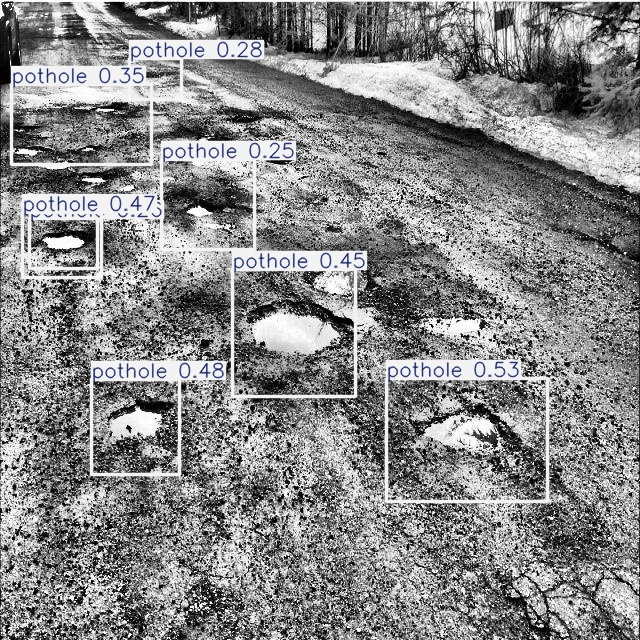

In [39]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained YOLOv8 model (or last trained model)
model = YOLO('/content/runs/detect/pothole_yolo_run/weights/best.pt')

# Path to your test image
test_img = '/content/dataset/test/images/50_jpg.rf.a935ae825e86d51b65b61de44b1557c0.jpg'

# Run prediction and save results
results = model.predict(
    source=test_img,  # the test image
    conf=0.25,        # confidence threshold
    save=True,        # save annotated image
    show=False        # don't display each step inline
)

# Get the directory where the results are saved directly from the results object
if results and hasattr(results[0], 'save_dir'):
    saved_results_dir = results[0].save_dir
    image_name = os.path.basename(test_img)
    predicted_image_path = os.path.join(saved_results_dir, image_name)

    print(f"Predicted image saved to: {predicted_image_path}")

    # Display the saved result
    display(Image(predicted_image_path))
else:
    print("Prediction results or save directory not found.")


image 1/66 /content/dataset/test/images/106_jpg.rf.56bae6c6a0e25c387ffe77ec789a5a10.jpg: 640x640 1 pothole, 7.9ms
image 2/66 /content/dataset/test/images/118_jpg.rf.b5745bd72776fd7fea8479a531f5a95a.jpg: 640x640 2 potholes, 7.2ms
image 3/66 /content/dataset/test/images/129_jpg.rf.3b8faad5fc638518c5798255ab8620bf.jpg: 640x640 1 pothole, 7.3ms
image 4/66 /content/dataset/test/images/17_jpg.rf.360aa6b1287cd971809537b108061475.jpg: 640x640 2 potholes, 7.3ms
image 5/66 /content/dataset/test/images/232_jpg.rf.13afb4e95775f8b75c5e5b9d89fe7d81.jpg: 640x640 9 potholes, 7.2ms
image 6/66 /content/dataset/test/images/288_jpg.rf.f67adf374f71f51026eff3d394d4091a.jpg: 640x640 1 pothole, 7.3ms
image 7/66 /content/dataset/test/images/320_jpg.rf.7ea64f661ba694551be2fbde7751dfab.jpg: 640x640 (no detections), 7.2ms
image 8/66 /content/dataset/test/images/326_jpg.rf.a000c1a641851706de30904e98308a8e.jpg: 640x640 2 potholes, 7.3ms
image 9/66 /content/dataset/test/images/45_jpg.rf.7aff8c18757eb2342ecd3e7102d4

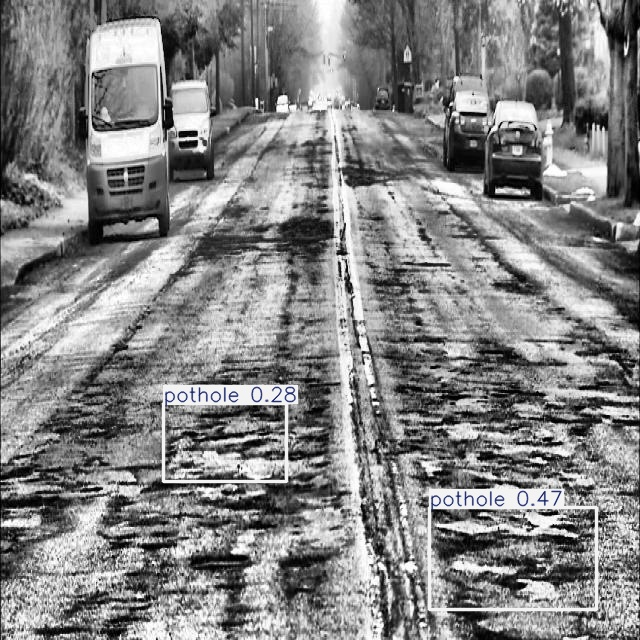

In [37]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained YOLOv8 model (or last trained model)
model = YOLO('/content/runs/detect/pothole_yolo_run/weights/best.pt')

# Path to the test images directory
test_images_dir = '/content/dataset/test/images'

# Run prediction on all test images and save results
results = model.predict(
    source=test_images_dir,  # the test images directory
    conf=0.25,        # confidence threshold
    save=True,        # save annotated images
    show=False        # don't display each step inline
)

# Get the directory where the results are saved
# This will be the last directory created in /content/runs/detect/predict
predict_dir = sorted([d for d in os.listdir('/content/runs/detect') if d.startswith('predict')])[-1]
saved_results_dir = os.path.join('/content/runs/detect', predict_dir)

print(f"Predicted images saved to: {saved_results_dir}")

# Display a few of the saved images as examples
print("\nDisplaying a few predicted images:")
saved_images = [f for f in os.listdir(saved_results_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
for i, image_name in enumerate(saved_images[:5]): # Displaying the first 5 images
    image_path = os.path.join(saved_results_dir, image_name)
    print(f"Displaying: {image_name}")
    display(Image(image_path))

In [27]:
# Run validation on the trained model
results = model.val()

# The results object contains the evaluation metrics
# You can access them like this:
print("Validation Results:")
print(f"mAP50: {results.box.map50}")
print(f"mAP50-95: {results.box.map}")
print(f"Precision: {results.box.p}")
print(f"Recall: {results.box.r}")

# You can also print metrics per class
print("\nMetrics per class:")
for i, name in enumerate(results.names):
    # Check if the index is within the bounds of all_ap
    if i < results.box.all_ap.shape[0]:
        print(f"{name}: Precision={results.box.p[i]:.4f}, Recall={results.box.r[i]:.4f}, mAP50={results.box.all_ap[i, 0]:.4f}, mAP50-95={results.box.all_ap[i].mean():.4f}")
    else:
        print(f"{name}: No metrics available (likely no ground truth instances or predictions for this class)")

Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 836.1±91.7 MB/s, size: 61.3 KB)
val: Scanning /content/dataset/valid/labels.cache... 40 images, 106 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 146/146 291.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.5it/s 2.9s
                   all        146        127      0.371      0.384      0.327      0.134
               objects          3          3      0.435      0.333       0.35      0.174
               pothole         37        124      0.306      0.435      0.305     0.0939
Speed: 3.6ms preprocess, 5.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/detect/val4
Validation Results:
mAP50: 0.32736528005059085
mAP50-95: 0.13410818361676974
Precision: [    0.43543     0.30614]
Recall: [    0.33333     0.43548]

Metrics per class:
0: Precision=0